# Project 3: Web APIs & NLP - Data Cleaning and EDA
- Project 3 done by Anand Ramchandani

# Import Libraries

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid")

import requests
import time
import string
import random

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re

## Load/Import Data

- Reading in data scraped from Reddit API in 01_Data_Gathering_from_Subreddits.ipynb

In [106]:
# Read in the Beer data
beer = pd.read_csv('../project_3/datasets/beer.csv')

In [107]:
# Read in the Wine data
wine = pd.read_csv('../project_3/datasets/wine.csv')

## Display Data

In [108]:
beer.head()

,Unnamed: 0,name,author,title,selftext,subreddit
0,0,t3_i0we2n,botulizard,Beer Suggestions on r/beer And You: So You Wan...,"Hi, Howdy, Hello! No doubt you’re here because...",beer
1,1,t3_wkwty3,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
2,2,t3_wmrj0l,DocGerbil256,What is the best thematic brewery/taproom?,I'm talking about a brewery or taproom that ha...,beer
3,3,t3_wn213p,Woah-Big-Gulps-Huh,Asheville NC brewery recommendations?,"I’ve looked at lists on Untapped, Beeradvocate...",beer
4,4,t3_wm8rnq,psychologicalprowler,"I am mexican and I’m genuinely curious, what w...",NaN,beer


In [109]:
beer.drop(columns='Unnamed: 0', inplace=True)
beer.head()

,name,author,title,selftext,subreddit
0,t3_i0we2n,botulizard,Beer Suggestions on r/beer And You: So You Wan...,"Hi, Howdy, Hello! No doubt you’re here because...",beer
1,t3_wkwty3,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
2,t3_wmrj0l,DocGerbil256,What is the best thematic brewery/taproom?,I'm talking about a brewery or taproom that ha...,beer
3,t3_wn213p,Woah-Big-Gulps-Huh,Asheville NC brewery recommendations?,"I’ve looked at lists on Untapped, Beeradvocate...",beer
4,t3_wm8rnq,psychologicalprowler,"I am mexican and I’m genuinely curious, what w...",NaN,beer


In [110]:
beer.shape

(988, 5)

In [111]:
wine.head()

,Unnamed: 0,name,author,title,selftext,subreddit
0,0,t3_r7lf76,cheezerman,[MEGA THREAD] - How Much is My Wine Worth?,Want to know how much that bottle of 1945 Chât...,wine
1,1,t3_wmciew,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
2,2,t3_wmuxwp,Defiant_Day8427,Starting our wine cellar project,NaN,wine
3,3,t3_wmqfvf,Boney3147,Advice on this 1971 Haut-Brion,NaN,wine
4,4,t3_wms859,chicfan51,"Ordered Sancerre, was brought Pouilly-Fumé","Hey everyone, was out to dinner and had an int...",wine


In [112]:
wine.drop(columns='Unnamed: 0', inplace=True)
wine.head()

,name,author,title,selftext,subreddit
0,t3_r7lf76,cheezerman,[MEGA THREAD] - How Much is My Wine Worth?,Want to know how much that bottle of 1945 Chât...,wine
1,t3_wmciew,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
2,t3_wmuxwp,Defiant_Day8427,Starting our wine cellar project,NaN,wine
3,t3_wmqfvf,Boney3147,Advice on this 1971 Haut-Brion,NaN,wine
4,t3_wms859,chicfan51,"Ordered Sancerre, was brought Pouilly-Fumé","Hey everyone, was out to dinner and had an int...",wine


In [113]:
wine.shape

(999, 5)

In [114]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       988 non-null    object
 1   author     988 non-null    object
 2   title      988 non-null    object
 3   selftext   745 non-null    object
 4   subreddit  988 non-null    object
dtypes: object(5)
memory usage: 38.7+ KB


In [115]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       999 non-null    object
 1   author     999 non-null    object
 2   title      999 non-null    object
 3   selftext   511 non-null    object
 4   subreddit  999 non-null    object
dtypes: object(5)
memory usage: 39.1+ KB


In [116]:
beer.describe()

,name,author,title,selftext,subreddit
count,988,988,988,745,988
unique,988,800,933,692,1
top,t3_i0we2n,AutoModerator,Free Talk Friday - /r/beer chat time,"Thread shitting is encouraged! Have fun, talk ...",beer
freq,1,57,15,15,988


In [117]:
wine.describe()

,name,author,title,selftext,subreddit
count,999,999,999,511,999
unique,972,714,968,494,1
top,t3_r7lf76,odedi1,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
freq,2,39,6,6,999


## Checking for Duplicates

### Beer Duplicates

In [118]:
# Finding out how many duplicate rows there are in beer
beer["name"].duplicated().value_counts()

False    988
Name: name, dtype: int64

- No duplicates observed for name under beer

In [119]:
# Let's take a look at duplicate authors in r/beer
beer["author"].duplicated().value_counts()

False    800
True     188
Name: author, dtype: int64

In [120]:
beer_duplicates = beer["author"].duplicated(keep=False) 
beer[beer_duplicates].sort_values(by="author").head(10)

,name,author,title,selftext,subreddit
913,t3_upobj0,1998tkhri,Looking for New York City / New Jersey Recomme...,I [posted](https://www.reddit.com/r/beer/comme...,beer
409,t3_vs9qg2,1998tkhri,Where to Buy Single Bottle of Beer (NJ USA)?,"This is a silly question, but I discovered tha...",beer
1,t3_wkwty3,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
554,t3_vgkyus,AutoModerator,Monday Morning Quarterback - beer recommendati...,Recommend or ask for beer recommendations. Di...,beer
532,t3_vi4psm,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
523,t3_viwe8i,AutoModerator,Throwback Thursday - classic beers and reviews...,This post has a dual purpose. \n\nTell u...,beer
489,t3_vluygh,AutoModerator,Monday Morning Quarterback - beer recommendati...,Recommend or ask for beer recommendations. Di...,beer
471,t3_vnf9ct,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
461,t3_vo7t99,AutoModerator,Throwback Thursday - classic beers and reviews...,This post has a dual purpose. \n\nTell u...,beer
455,t3_vp0akx,AutoModerator,Free Talk Friday - /r/beer chat time,"Thread shitting is encouraged! Have fun, talk ...",beer


- We can see the same author has many different titles, some of which are duplicates, so it would make more sense to remove duplicate selftext as they coincide with duplicate titles as well

In [121]:
# Let's take a look at duplicate selftext in r/beer
beer["selftext"].duplicated().value_counts()

False    693
True     295
Name: selftext, dtype: int64

In [122]:
beer_duplicates = beer["selftext"].duplicated(keep=False) 
beer[beer_duplicates].sort_values(by="selftext").head(50)

,name,author,title,selftext,subreddit
1,t3_wkwty3,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
334,t3_vy2nvj,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
869,t3_uscclu,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
471,t3_vnf9ct,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
272,t3_w3lqku,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
532,t3_vi4psm,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
395,t3_vsph03,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
202,t3_w9e5ml,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
120,t3_wf5zr8,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer
797,t3_uxguev,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer


In [123]:
#Removing duplicates for selftext
beer = beer.drop_duplicates(subset='selftext', keep='first')

In [124]:
# Checking if the duplicates are still there
beer["selftext"].duplicated().value_counts()

False    693
Name: selftext, dtype: int64

In [125]:
# Seeing the new shape of beer dataframe
beer.shape

(693, 5)

### Wine Duplicates

In [126]:
# Finding out how many duplicate rows there are for name in wine
wine["name"].duplicated().value_counts()

False    972
True      27
Name: name, dtype: int64

In [127]:
# taking a closer look at the duplicated rows 
wine_duplicates = wine["name"].duplicated(keep=False) 
wine[wine_duplicates].sort_values(by="name").head(100)

,name,author,title,selftext,subreddit
0,t3_r7lf76,cheezerman,[MEGA THREAD] - How Much is My Wine Worth?,Want to know how much that bottle of 1945 Chât...,wine
972,t3_r7lf76,cheezerman,[MEGA THREAD] - How Much is My Wine Worth?,Want to know how much that bottle of 1945 Chât...,wine
992,t3_wltqr1,Leflaively,Nothing much… just ‘44 Haut-Brion,Recorked in the mid 90s. Opened last night for...,wine
20,t3_wltqr1,Leflaively,Nothing much… just ‘44 Haut-Brion,Recorked in the mid 90s. Opened last night for...,wine
996,t3_wlznj0,n1c0sax0,Opened a nice bottle for a very good friend wi...,NaN,wine
24,t3_wlznj0,n1c0sax0,Opened a nice bottle for a very good friend wi...,NaN,wine
994,t3_wm6jhw,odedi1,School House Vineyard Spring Mountain District...,NaN,wine
22,t3_wm6jhw,odedi1,School House Vineyard Spring Mountain District...,NaN,wine
23,t3_wm7xv0,CuriousernCurioser,First time tasting a wine with distinctive bla...,NaN,wine
995,t3_wm7xv0,CuriousernCurioser,First time tasting a wine with distinctive bla...,NaN,wine


- Looking at these we can see these duplicated rows are the same, which means we can drop these

In [128]:
#Removing duplicates for name in Wine dataframe
wine = wine.drop_duplicates(subset='name', keep='first')

In [129]:
# Checking if the duplicates are still there
wine["name"].duplicated().value_counts()

False    972
Name: name, dtype: int64

In [130]:
# Seeing the new shape of wine dataframe
wine.shape

(972, 5)

In [131]:
# Checking if we still see duplicates in selftext
wine["selftext"].duplicated().value_counts()

False    495
True     477
Name: selftext, dtype: int64

In [132]:
# Below we can see there are a few duplicates under selftext which we can remove
wine_duplicates = wine["selftext"].duplicated(keep=False) 
wine[wine_duplicates].sort_values(by="selftext").head(50)

,name,author,title,selftext,subreddit
1,t3_wmciew,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
219,t3_wgmgj4,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
412,t3_wavpnx,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
612,t3_w51ubl,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
820,t3_vzg7ea,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine
2,t3_wmuxwp,Defiant_Day8427,Starting our wine cellar project,NaN,wine
3,t3_wmqfvf,Boney3147,Advice on this 1971 Haut-Brion,NaN,wine
5,t3_wmwz2q,Euphoric_Cause3322,What website or app do you wish existed relati...,NaN,wine
10,t3_wmi2is,Lehto,"One the same night as the Roulot, we went for ...",NaN,wine
12,t3_wn0udz,Shdwrptr,Maritana 2018 Pinot Noir,NaN,wine


In [133]:
#Removing duplicates for name in Wine dataframe
wine = wine.drop_duplicates(subset='selftext', keep='first')

In [134]:
# Checking if the duplicates are still there
wine["name"].duplicated().value_counts()

False    495
Name: name, dtype: int64

In [135]:
wine.shape

(495, 5)

- Thus we have removed most, if not all duplicate posts, now we move on to look at null values

## Check for Null Values

In [136]:
beer.isnull().sum()

name         0
author       0
title        0
selftext     1
subreddit    0
dtype: int64

In [137]:
wine.isnull().sum()

name         0
author       0
title        0
selftext     1
subreddit    0
dtype: int64

In [138]:
# trying to determine how many rows have empty strings or NaN in the selftext field
display(beer.loc[beer["selftext"]==""]["selftext"].count())
display(beer["selftext"].isnull().sum())

0

1

In [139]:
# trying to determine how many rows have empty strings or NaN in the selftext field
display(wine.loc[wine["selftext"]==""]["selftext"].count())
display(wine["selftext"].isnull().sum())

0

1

In [140]:
# Formula to see Percentage of Null Values
def percent_null(df):
    for i in df:
        if df[i].isnull().sum() > 0:
            print(i)
            print("Number of Null Values: " + str(df[i].isnull().sum()))
            print("Percentage of Nulls = " + str(np.round((df[i].isnull().sum()*100 / len(df)), 2)) + "%")
            print("\n")

In [141]:
percent_null(beer)

selftext
Number of Null Values: 1
Percentage of Nulls = 0.14%




In [142]:
percent_null(wine)

selftext
Number of Null Values: 1
Percentage of Nulls = 0.2%




## Taking care of Null Values

In [143]:
#Filling null values in Beer
beer["selftext"].fillna("", inplace=True)
beer["selftext"].isnull().sum()

0

In [144]:
#Filling null values in Wine
wine["selftext"].fillna("", inplace=True)
wine["selftext"].isnull().sum()

0

## Checking Blank entries in Beer and Wine

In [145]:
beer["selftext"]

0      Hi, Howdy, Hello! No doubt you’re here because...
1      Do you have questions about beer? We have answ...
2      I'm talking about a brewery or taproom that ha...
3      I’ve looked at lists on Untapped, Beeradvocate...
4                                                       
                             ...                        
981    I have this thing where I absolutely crave sou...
984    My friends were giving me shit for drinking a ...
985    [https://www.beeradvisory.com/the-hazy-origins...
986    Hey y’all! I’m sort of a newbie when it comes ...
987    My parents are in Duseldorf for the next coupl...
Name: selftext, Length: 693, dtype: object

In [146]:
# Counting the length of all the entries for title and selftext 
beer["title_length"] = [ len(i) for i in beer["title"] ]
beer["selftext_length"] = [ len(i) for i in beer["selftext"] ]
beer[["title", "title_length", "selftext", "selftext_length"]].head(10)

,title,title_length,selftext,selftext_length
0,Beer Suggestions on r/beer And You: So You Wan...,76,"Hi, Howdy, Hello! No doubt you’re here because...",4511
1,No Stupid Questions Wednesday - ask anything a...,55,Do you have questions about beer? We have answ...,368
2,What is the best thematic brewery/taproom?,42,I'm talking about a brewery or taproom that ha...,1216
3,Asheville NC brewery recommendations?,37,"I’ve looked at lists on Untapped, Beeradvocate...",126
4,"I am mexican and I’m genuinely curious, what w...",202,,0
5,Detroit breweries near river,28,Hey fellow beer connoisseurs! I’m going to Det...,235
6,Free Talk Friday - /r/beer chat time,36,"Thread shitting is encouraged! Have fun, talk ...",276
8,So we drove to Tree House from Texas...,39,"...and holy shit, I would do it again!\n\nMy w...",202
9,I got 72 cans of Old Style beer...,34,What kind of person drinks Old Style?,37
10,Most expensive beer you've bought?,34,$46 for a 4 pack of Bells Imperial Stout? (I ...,169


In [147]:
beer["title_length"].sort_values(ascending=True).head()

289    4
898    5
179    5
438    6
50     7
Name: title_length, dtype: int64

In [148]:
beer["selftext_length"].sort_values(ascending=True).head()

4       0
444     6
416     9
176    13
28     17
Name: selftext_length, dtype: int64

- We can see that there are some blank entries in selftext

Text(0, 0.5, 'Frequency')

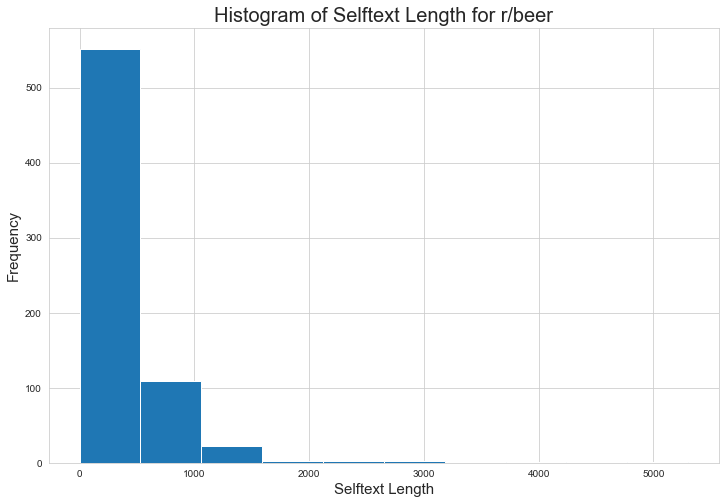

In [149]:
plt.figure(figsize=(12,8))
plt.hist(beer["selftext_length"])
plt.title("Histogram of Selftext Length for r/beer", fontsize=20)
plt.xlabel("Selftext Length", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

In [150]:
wine["selftext"]

0      Want to know how much that bottle of 1945 Chât...
1      Bottle porn without notes, random musings, off...
2                                                       
4      Hey everyone, was out to dinner and had an int...
6      For a few months now, apparently. Just wanted ...
                             ...                        
959    here's what im looking for...\n\n\+ can stay t...
960    I'm down here visiting family ( ambler ,pa) ar...
962    Hi everybody,\n\nI have created a webapp ( [ww...
969    My wife recently went pescitarian and we do mo...
970    I really enjoyed the buying recommendations an...
Name: selftext, Length: 495, dtype: object

In [151]:
# Counting the length of all the entries for title and selftext 
wine["title_length"] = [ len(i) for i in wine["title"] ]
wine["selftext_length"] = [ len(i) for i in wine["selftext"] ]
wine[["title", "title_length", "selftext", "selftext_length"]].head(10)

,title,title_length,selftext,selftext_length
0,[MEGA THREAD] - How Much is My Wine Worth?,42,Want to know how much that bottle of 1945 Chât...,133
1,Free Talk Friday,16,"Bottle porn without notes, random musings, off...",58
2,Starting our wine cellar project,32,,0
4,"Ordered Sancerre, was brought Pouilly-Fumé",42,"Hey everyone, was out to dinner and had an int...",720
6,Wineking on YouTube is back?!?,30,"For a few months now, apparently. Just wanted ...",109
7,Throw me your favourite left bank Bordeaux for...,58,…and convince me why I should buy it. Will be ...,170
8,2009 Château Rayas 🤯,20,Had the chance to finally give this a try and ...,502
9,What did wines hundreds of years ago taste like?,48,"I love wine, red in particular, bordeaux or ca...",531
11,Questions about decanting,25,I have browsed this sub and learned the follow...,677
15,New World style Burgundies,26,You always hear people describe certain Califo...,276


In [152]:
wine["title_length"].sort_values(ascending=True).head()

234    2
381    3
288    5
663    5
161    7
Name: title_length, dtype: int64

In [153]:
wine["selftext_length"].sort_values(ascending=True).head()

2       0
494    30
325    32
166    36
819    50
Name: selftext_length, dtype: int64

Text(0, 0.5, 'Frequency')

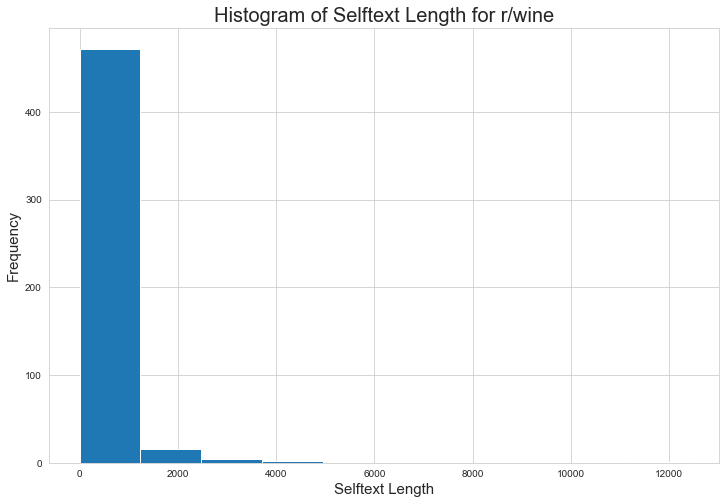

In [154]:
plt.figure(figsize=(12,8))
plt.hist(wine["selftext_length"])
plt.title("Histogram of Selftext Length for r/wine", fontsize=20)
plt.xlabel("Selftext Length", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

- In order to solve the issue of the blank selftext entries, we shall combine them with the title so as to make handling the entries easier

## Combining Title and Selftext entries in r/beer and r/wine respectively

In [155]:
beer["title_and_selftext"] = beer["title"] + "" + beer["selftext"]

In [156]:
beer.head()

,name,author,title,selftext,subreddit,title_length,selftext_length,title_and_selftext
0,t3_i0we2n,botulizard,Beer Suggestions on r/beer And You: So You Wan...,"Hi, Howdy, Hello! No doubt you’re here because...",beer,76,4511,Beer Suggestions on r/beer And You: So You Wan...
1,t3_wkwty3,AutoModerator,No Stupid Questions Wednesday - ask anything a...,Do you have questions about beer? We have answ...,beer,55,368,No Stupid Questions Wednesday - ask anything a...
2,t3_wmrj0l,DocGerbil256,What is the best thematic brewery/taproom?,I'm talking about a brewery or taproom that ha...,beer,42,1216,What is the best thematic brewery/taproom?I'm ...
3,t3_wn213p,Woah-Big-Gulps-Huh,Asheville NC brewery recommendations?,"I’ve looked at lists on Untapped, Beeradvocate...",beer,37,126,Asheville NC brewery recommendations?I’ve look...
4,t3_wm8rnq,psychologicalprowler,"I am mexican and I’m genuinely curious, what w...",,beer,202,0,"I am mexican and I’m genuinely curious, what w..."


In [157]:
wine["title_and_selftext"] = wine["title"] + "" + wine["selftext"]

In [158]:
wine.head()

,name,author,title,selftext,subreddit,title_length,selftext_length,title_and_selftext
0,t3_r7lf76,cheezerman,[MEGA THREAD] - How Much is My Wine Worth?,Want to know how much that bottle of 1945 Chât...,wine,42,133,[MEGA THREAD] - How Much is My Wine Worth?Want...
1,t3_wmciew,AutoModerator,Free Talk Friday,"Bottle porn without notes, random musings, off...",wine,16,58,"Free Talk FridayBottle porn without notes, ran..."
2,t3_wmuxwp,Defiant_Day8427,Starting our wine cellar project,,wine,32,0,Starting our wine cellar project
4,t3_wms859,chicfan51,"Ordered Sancerre, was brought Pouilly-Fumé","Hey everyone, was out to dinner and had an int...",wine,42,720,"Ordered Sancerre, was brought Pouilly-FuméHey ..."
6,t3_wmvmgu,Cincymailman,Wineking on YouTube is back?!?,"For a few months now, apparently. Just wanted ...",wine,30,109,Wineking on YouTube is back?!?For a few months...


## Rearranging Columns

In [159]:
columns = ["name", "author", "title_and_selftext", "subreddit"]

In [160]:
beer = beer[columns]
wine = wine[columns]

In [161]:
display(beer.head())
display(wine.head())

,name,author,title_and_selftext,subreddit
0,t3_i0we2n,botulizard,Beer Suggestions on r/beer And You: So You Wan...,beer
1,t3_wkwty3,AutoModerator,No Stupid Questions Wednesday - ask anything a...,beer
2,t3_wmrj0l,DocGerbil256,What is the best thematic brewery/taproom?I'm ...,beer
3,t3_wn213p,Woah-Big-Gulps-Huh,Asheville NC brewery recommendations?I’ve look...,beer
4,t3_wm8rnq,psychologicalprowler,"I am mexican and I’m genuinely curious, what w...",beer


,name,author,title_and_selftext,subreddit
0,t3_r7lf76,cheezerman,[MEGA THREAD] - How Much is My Wine Worth?Want...,wine
1,t3_wmciew,AutoModerator,"Free Talk FridayBottle porn without notes, ran...",wine
2,t3_wmuxwp,Defiant_Day8427,Starting our wine cellar project,wine
4,t3_wms859,chicfan51,"Ordered Sancerre, was brought Pouilly-FuméHey ...",wine
6,t3_wmvmgu,Cincymailman,Wineking on YouTube is back?!?For a few months...,wine


In [162]:
beer.shape

(693, 4)

In [163]:
wine.shape

(495, 4)

# Training Dataset

In [164]:
train = pd.concat([beer, wine], ignore_index=True)

In [165]:
train.head(10)

,name,author,title_and_selftext,subreddit
0,t3_i0we2n,botulizard,Beer Suggestions on r/beer And You: So You Wan...,beer
1,t3_wkwty3,AutoModerator,No Stupid Questions Wednesday - ask anything a...,beer
2,t3_wmrj0l,DocGerbil256,What is the best thematic brewery/taproom?I'm ...,beer
3,t3_wn213p,Woah-Big-Gulps-Huh,Asheville NC brewery recommendations?I’ve look...,beer
4,t3_wm8rnq,psychologicalprowler,"I am mexican and I’m genuinely curious, what w...",beer
5,t3_wn0zlk,Bus-According,Detroit breweries near riverHey fellow beer co...,beer
6,t3_wmkp0o,AutoModerator,Free Talk Friday - /r/beer chat timeThread shi...,beer
7,t3_wm6b4q,mrcrassic,So we drove to Tree House from Texas......and ...,beer
8,t3_wmudng,UpAt5amSince1986,I got 72 cans of Old Style beer...What kind of...,beer
9,t3_wlwflc,JasinNat,Most expensive beer you've bought?$46 for a 4 ...,beer


In [166]:
train.tail()

,name,author,title_and_selftext,subreddit
1183,t3_vv9v6v,wolverines_rage,Can you help me find a Winery/Vineyard to stay...,wine
1184,t3_vv88iq,DodoDozer,PA wine shopsI'm down here visiting family ( a...,wine
1185,t3_vv32lm,battle1900,Webapp suggesting wines similar to the one tha...,wine
1186,t3_vufntd,Club96shhh,Full bodied reds with vegetarian foodMy wife r...,wine
1187,t3_vufc8i,unkownperson18,What is the modern version of Steven Spurrier'...,wine


In [167]:
train.shape

(1188, 4)

- The main columns required for our purposes are title_and_selftext and the subreddit columns

In [168]:
train = train[["subreddit", "title_and_selftext"]]

In [169]:
train.head()

,subreddit,title_and_selftext
0,beer,Beer Suggestions on r/beer And You: So You Wan...
1,beer,No Stupid Questions Wednesday - ask anything a...
2,beer,What is the best thematic brewery/taproom?I'm ...
3,beer,Asheville NC brewery recommendations?I’ve look...
4,beer,"I am mexican and I’m genuinely curious, what w..."


In [170]:
train.tail()

,subreddit,title_and_selftext
1183,wine,Can you help me find a Winery/Vineyard to stay...
1184,wine,PA wine shopsI'm down here visiting family ( a...
1185,wine,Webapp suggesting wines similar to the one tha...
1186,wine,Full bodied reds with vegetarian foodMy wife r...
1187,wine,What is the modern version of Steven Spurrier'...


# Cleaning Text

In [171]:
#For the following section I referenced the following links:
#https://stackoverflow.com/questions/5871793/remove-punctuation-from-string-with-regex#:~:text=You%20can%20use%20this%3A,s%5D%22%2C%20%22%22)%3B
#https://stackoverflow.com/questions/26127775/remove-html-entities-and-extract-text-content-using-regex
#https://stackoverflow.com/questions/4035562/java-regex-match-characters-outside-basic-multilingual-plane

In [172]:
# Creating a Function to clean the text in title_and_selftext
def clean_text(text):
    # Make the text lowercase
    text = text.lower()

    # Removing HTML special entities
    text = re.sub(r'\&\w*;', '', text)
    
    # Removing hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Removing punctuation and split 's, 't, 've
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)

    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

In [173]:
train["title_and_selftext"] = train["title_and_selftext"].apply(clean_text)

In [174]:
train.head(10)

,subreddit,title_and_selftext
0,beer,beer suggestions on r beer and you so you want...
1,beer,no stupid questions wednesday ask anything abo...
2,beer,what is the best thematic brewery taproom i m ...
3,beer,asheville nc brewery recommendations i’ve look...
4,beer,i am mexican and i’m genuinely curious what wo...
5,beer,detroit breweries near riverhey fellow beer co...
6,beer,free talk friday r beer chat timethread shitti...
7,beer,so we drove to tree house from texas and holy ...
8,beer,i got 72 cans of old style beer what kind of p...
9,beer,most expensive beer you ve bought 46 for a 4 p...


In [175]:
train.shape

(1188, 2)

In [176]:
train['title_and_selftext'].replace("i'm", 'i am')

0       beer suggestions on r beer and you so you want...
1       no stupid questions wednesday ask anything abo...
2       what is the best thematic brewery taproom i m ...
3       asheville nc brewery recommendations i’ve look...
4       i am mexican and i’m genuinely curious what wo...
                              ...                        
1183    can you help me find a winery vineyard to stay...
1184    pa wine shopsi m down here visiting family amb...
1185    webapp suggesting wines similar to the one tha...
1186    full bodied reds with vegetarian foodmy wife r...
1187    what is the modern version of steven spurrier ...
Name: title_and_selftext, Length: 1188, dtype: object

In [177]:
train.head(6)

,subreddit,title_and_selftext
0,beer,beer suggestions on r beer and you so you want...
1,beer,no stupid questions wednesday ask anything abo...
2,beer,what is the best thematic brewery taproom i m ...
3,beer,asheville nc brewery recommendations i’ve look...
4,beer,i am mexican and i’m genuinely curious what wo...
5,beer,detroit breweries near riverhey fellow beer co...


## Labelling Subreddit as 0 or 1

In [178]:
# Changing Subreddits off beer and wine to 0 or 1 values. beer = 0, wine = 1

train['subreddit'] = train['subreddit'].map({'beer': 0,'wine': 1})
train.head()

,subreddit,title_and_selftext
0,0,beer suggestions on r beer and you so you want...
1,0,no stupid questions wednesday ask anything abo...
2,0,what is the best thematic brewery taproom i m ...
3,0,asheville nc brewery recommendations i’ve look...
4,0,i am mexican and i’m genuinely curious what wo...


# NLP Pre-processing and Exploration

## Tokenizing and Lammatization

In [179]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words    

In [180]:
train["title_and_selftext"] = train["title_and_selftext"].apply(lemmatize_words)

In [181]:
# Drop rows where title_and_selftext = ''
train = train[train["title_and_selftext"] != '']
train = train.reset_index(drop=True)

In [182]:
train.shape

(1188, 2)

In [183]:
train.head(1000)

,subreddit,title_and_selftext
0,0,beer suggestion on r beer and you so you want ...
1,0,no stupid question wednesday ask anything abou...
2,0,what is the best thematic brewery taproom i m ...
3,0,asheville nc brewery recommendation i’ve looke...
4,0,i am mexican and i’m genuinely curious what wo...
...,...,...
995,1,why do i like italian wine but french wine mak...
996,1,mid upper tier recs based on flavor profile sm...
997,1,newbie wine age questionhi all is there a gene...
998,1,south american wine learningwhat are great res...


## Save Training Dataset after Cleaning and EDA

In [184]:
# Exporting Dataset post-EDA
train.to_csv('../project_3/datasets/train.csv')

# CountVectorizer

- The easiest way for us to convert text data into a structured, numeric X dataframe is to use CountVectorizer.

### Most frequent words for Beer

In [185]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 35)

In [186]:
# input for CountVectorizer is an array of strings
input_beer = train[train['subreddit'] == 0]['title_and_selftext']

In [187]:
# Fit the vectorizer on our corpus.
beer_words = cvec.fit_transform(input_beer)

In [188]:
# convert output to a Numpy array
beer_words = beer_words.toarray()

In [189]:
beer_words_list = cvec.get_feature_names()

In [190]:
beer_words_list

['ale',
 'beer',
 'best',
 'bottle',
 'brewery',
 'craft',
 'day',
 'doe',
 'don',
 'drink',
 'drinking',
 'flavor',
 'good',
 'ha',
 'ipa',
 'just',
 'know',
 'lager',
 'light',
 'like',
 'looking',
 'love',
 'new',
 'really',
 'recommendation',
 'taste',
 'thanks',
 'think',
 'time',
 'tried',
 'try',
 've',
 'wa',
 'want',
 'year']

### Most frequent words for Wine

In [191]:
# input for CountVectorizer is an array of strings
input_wine = train[train['subreddit'] == 1]['title_and_selftext']

In [192]:
# Fit the vectorizer on our corpus.
wine_words = cvec.fit_transform(input_wine)

In [193]:
# convert output to a Numpy array
wine_words = wine_words.toarray()

In [194]:
wine_words_list = cvec.get_feature_names()

In [195]:
wine_words_list

['best',
 'bordeaux',
 'bottle',
 'buy',
 'day',
 'doe',
 'don',
 'drink',
 'glass',
 'good',
 'great',
 'ha',
 'just',
 'know',
 'like',
 'looking',
 'love',
 'new',
 'note',
 'really',
 'recommendation',
 'red',
 'taste',
 'tasting',
 'thanks',
 'think',
 'time',
 'try',
 've',
 'wa',
 'want',
 'white',
 'wine',
 'winery',
 'year']

In [196]:
beer_df = pd.DataFrame(beer_words, columns=beer_words_list)

beer_df.sum().sort_values(ascending=False).head(50)

beer              1319
like               425
wa                 300
brewery            239
just               236
ve                 207
know               184
good               161
don                154
really             143
taste              140
ha                 138
drink              128
ipa                127
looking            123
ale                109
want               104
year               103
love               102
doe                 99
tried               98
time                96
light               93
think               93
drinking            92
best                92
recommendation      92
lager               89
bottle              87
new                 87
try                 86
thanks              83
day                 82
craft               79
flavor              75
dtype: int64

In [197]:
beer_df.mean().sort_values(ascending=False).head(50)

beer              1.903319
like              0.613276
wa                0.432900
brewery           0.344877
just              0.340548
ve                0.298701
know              0.265512
good              0.232323
don               0.222222
really            0.206349
taste             0.202020
ha                0.199134
drink             0.184704
ipa               0.183261
looking           0.177489
ale               0.157287
want              0.150072
year              0.148629
love              0.147186
doe               0.142857
tried             0.141414
time              0.138528
light             0.134199
think             0.134199
drinking          0.132756
best              0.132756
recommendation    0.132756
lager             0.128427
bottle            0.125541
new               0.125541
try               0.124098
thanks            0.119769
day               0.118326
craft             0.113997
flavor            0.108225
dtype: float64

In [198]:
wine_df = pd.DataFrame(wine_words, columns=wine_words_list)

wine_df.sum().sort_values(ascending=False).head(50)

wine              1222
bottle             346
wa                 295
like               247
know               161
ve                 153
just               143
red                134
good               124
don                123
year               117
ha                 117
looking            114
recommendation     112
time               106
really             100
tasting             99
day                 96
taste               92
want                85
drink               85
winery              83
best                81
glass               80
new                 77
thanks              76
white               72
love                71
bordeaux            70
buy                 69
try                 68
note                67
think               64
great               63
doe                 62
dtype: int64

In [199]:
wine_df.mean().sort_values(ascending=False).head(50)

wine              2.468687
bottle            0.698990
wa                0.595960
like              0.498990
know              0.325253
ve                0.309091
just              0.288889
red               0.270707
good              0.250505
don               0.248485
year              0.236364
ha                0.236364
looking           0.230303
recommendation    0.226263
time              0.214141
really            0.202020
tasting           0.200000
day               0.193939
taste             0.185859
want              0.171717
drink             0.171717
winery            0.167677
best              0.163636
glass             0.161616
new               0.155556
thanks            0.153535
white             0.145455
love              0.143434
bordeaux          0.141414
buy               0.139394
try               0.137374
note              0.135354
think             0.129293
great             0.127273
doe               0.125253
dtype: float64

## TF-IDF Vectorizer

In [200]:
tvec = TfidfVectorizer(analyzer = "word", 
                     stop_words = "english", 
                     max_features = 10000, 
                     ngram_range = (1, 3))

In [201]:
beer_tf_words = tvec.fit_transform(input_beer)

In [202]:
beer_tf_words = beer_tf_words.toarray()

In [203]:
beer_matrix = pd.DataFrame(beer_tf_words, columns=tvec.get_feature_names())

In [204]:
beer_matrix.sum().sort_values(ascending=False).head(50)

beer              41.194141
like              18.164744
brewery           16.198065
wa                13.731760
just              12.541496
ve                12.204707
know              11.417261
good              10.710433
looking            9.337171
taste              9.124195
ipa                8.988784
drink              8.769602
ha                 8.549104
don                8.521945
best               8.405035
recommendation     8.360334
really             7.959090
bottle             7.513538
love               7.498557
doe                7.484689
ale                7.431837
try                7.368074
want               7.303680
year               7.202822
time               6.991948
drinking           6.886783
tried              6.855224
lager              6.746701
thanks             6.604580
think              6.502363
stout              6.434349
favorite           6.431542
light              6.353970
local              6.136693
day                6.010409
trying             5

In [205]:
wine_tf_words = tvec.fit_transform(input_wine)

In [206]:
wine_tf_words = wine_tf_words.toarray()

In [207]:
wine_matrix = pd.DataFrame(wine_tf_words, columns=tvec.get_feature_names())

In [208]:
wine_matrix.sum().sort_values(ascending=False).head(50)

wine              31.896926
bottle            14.361950
wa                11.535250
like              10.538440
know               8.055441
red                7.725882
recommendation     7.387815
ve                 7.370585
good               7.263070
just               7.153252
looking            7.134886
ha                 6.744784
year               6.436766
day                6.259072
don                6.257009
drink              6.076131
winery             5.913807
tasting            5.850914
time               5.811276
taste              5.718763
best               5.457288
thanks             5.425969
bordeaux           5.396837
white              5.376989
really             5.186993
glass              5.123156
want               5.098255
new                4.871024
love               4.869958
doe                4.750813
fridge             4.674379
buy                4.624830
help               4.308897
great              4.278810
red wine           4.262969
champagne          4